In [1]:
# import libraries
from sklearn import datasets
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

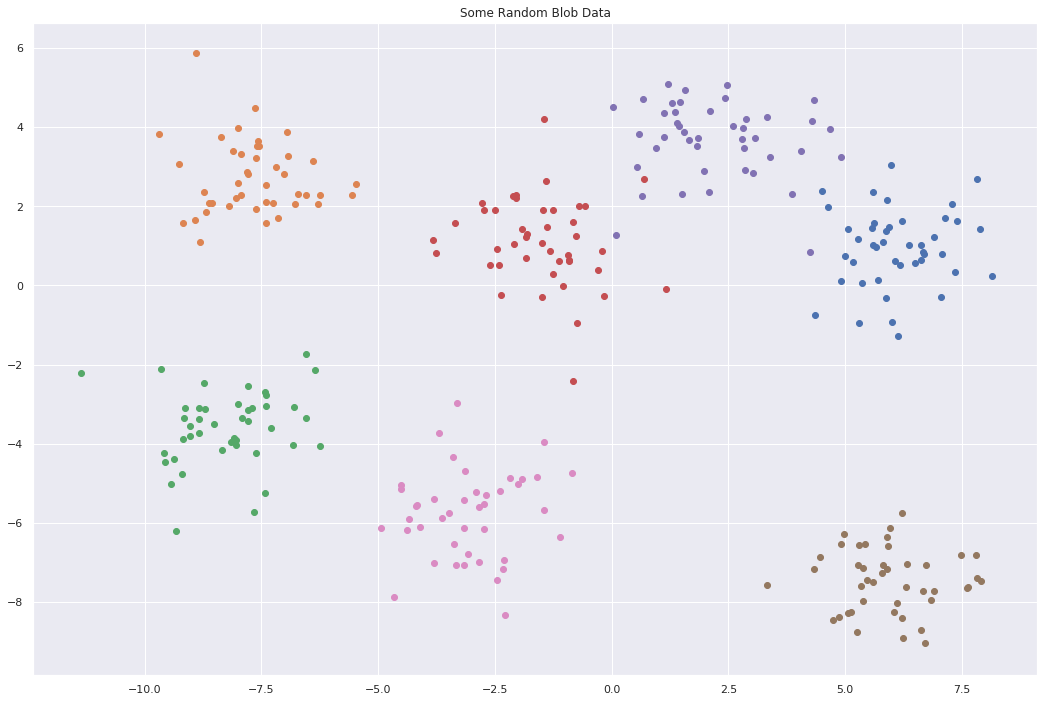

In [2]:
"""
    Create a bunch of gaussian blobs to fit a GMM model to
    
    This provides a ground truth for the groups
"""

# make blob dataset
centers = 7
X, y = datasets.make_blobs(
    n_samples=300,
    n_features=2,
    centers=centers,
    center_box=[-10,10],
    cluster_std=1.0,
    random_state=999
)

# visualize
fig, ax = plt.subplots(1,figsize=(18,12))
for i in range(centers):
    ax.scatter(X[y==i,0],X[y==i,1])
plt.title('Some Random Blob Data')
plt.show()

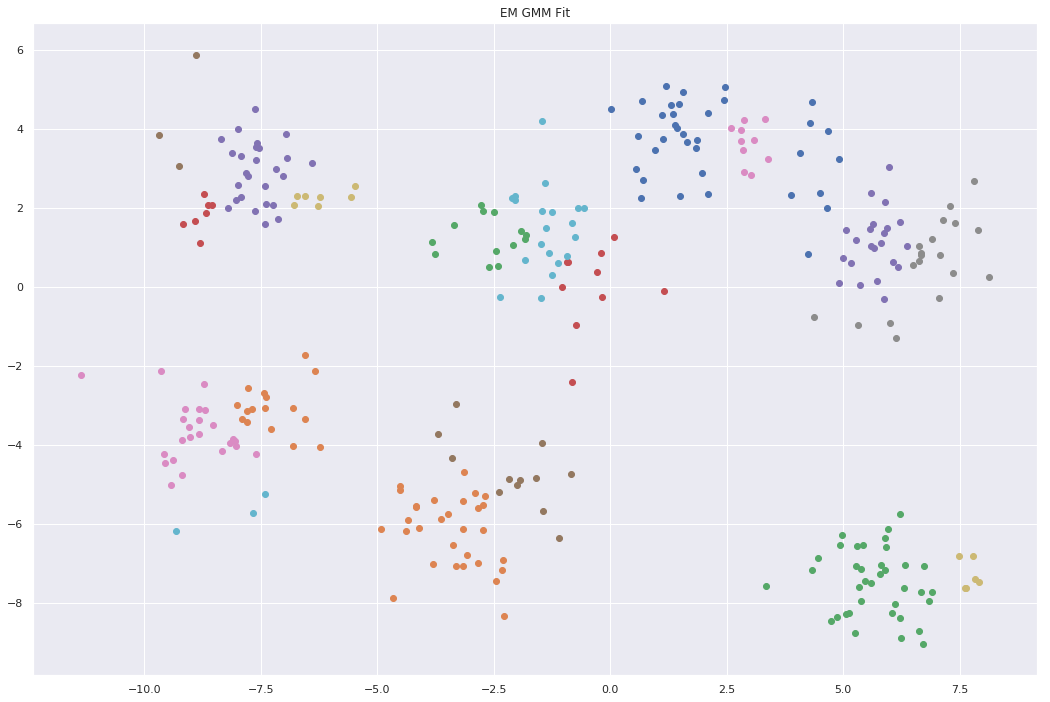

In [3]:
"""
    EM GMM
    
    We set the number of gaussian components to 20 (to compare with the VEM solution)
    
    The model seems to try to assign at least some points to each component
    
    Results are better if the number of gaussian components is set close to ground truth
"""
# run EM GMM
num_comps = 20
labels = GaussianMixture(
    n_components=num_comps,
    covariance_type='diag',
    random_state=999
).fit_predict(X)

# visualize
fig, ax = plt.subplots(1,figsize=(18,12))
for i in np.unique(labels):
    ax.scatter(X[labels==i,0],X[labels==i,1])
plt.title('EM GMM Fit')
plt.show()

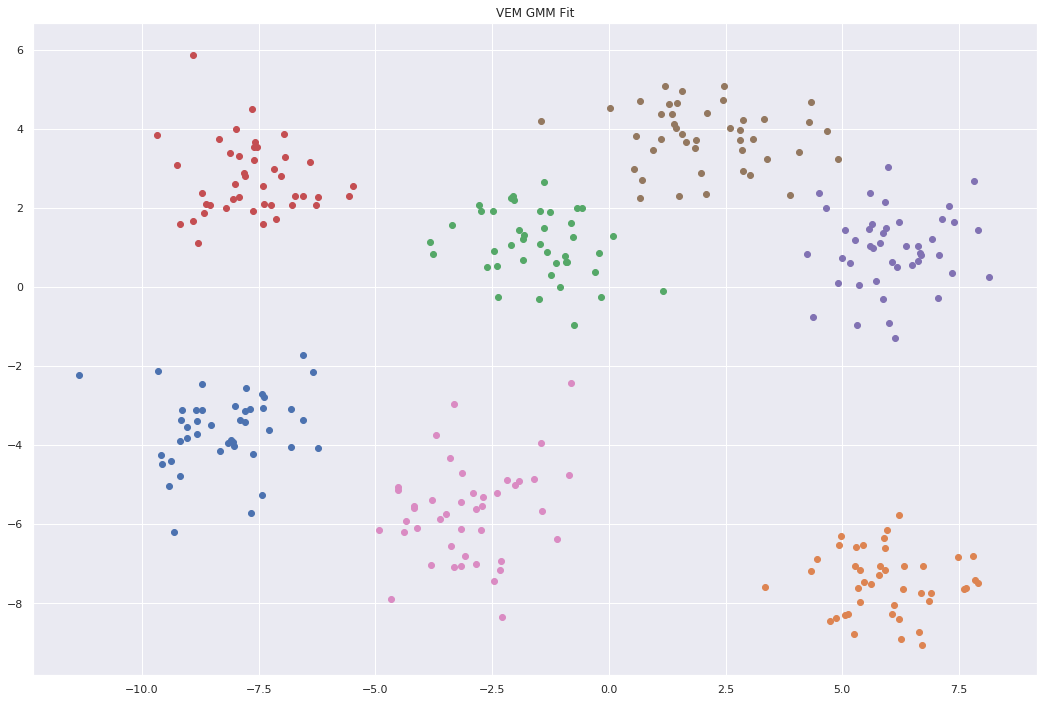

In [4]:
"""
    VEM GMM
    
    The variational model is able to "unmodel" components by setting certain gaussian components to 0
    
    The result is very close to ground truth, even without tuning the number of components
"""
# run VEM GMM
num_comps = 20
labels = BayesianGaussianMixture(
    n_components=num_comps,
    covariance_type='diag',
    max_iter=1000,
    weight_concentration_prior=None,
    mean_prior=None,
    covariance_prior=None,
    random_state=999
).fit_predict(X)

# visualize
fig, ax = plt.subplots(1,figsize=(18,12))
for i in np.unique(labels):
    ax.scatter(X[labels==i,0],X[labels==i,1])
plt.title('VEM GMM Fit')
plt.show()